In [45]:
from ioc2data import ioc2data
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import csv
import numpy as np
import glob
import os
from segmentos import segmentos
from matplotlib.dates import date2num
from utide import reconstruct,solve
from FunXSpectra import FunXSpectra
import matplotlib.ticker as mtick
from relleno_zeros import relleno_zeros


In [46]:
direccion_csv=r"C:\Users\ASUS\OneDrive - Universidad Técnica Federico Santa María\Memoria\Mareografos\Caldera2020"#direccion de guardado de los datos
dir_save=direccion_csv
fname='Rell_Cqbo.jpg'

http://www.ioc-sealevelmonitoring.org/bgraph.php?code=coqu&output=tab&period=1&endtime=2020-09-02
1016 datos.
Desde 2020-09-01 00:00:00 hasta 2020-09-02 00:00:00
coqu_2020-09-02.txt



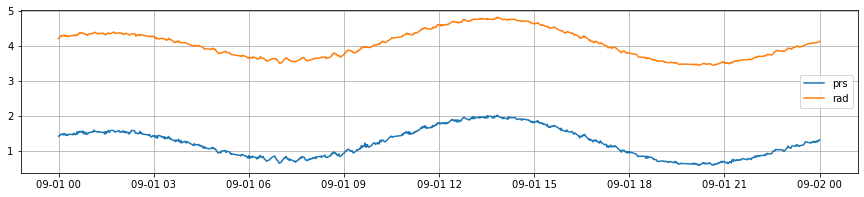

In [47]:
#extraer año completo y guardar como .txt
#aveces falla esta rutina ya que hay periodos seleccionados que no poseen datos 
ultima_fecha='2020-09-03'

ultima_fecha = dt.datetime.strptime(ultima_fecha, '%Y-%m-%d')
periodo=1 #dias a extraer (max 30)
code='coqu' #codigo del mareografo
lat_mareografo=-29.94969254

tiempo_mes=[] #listas que guardaran la columna tiempo, prs y rad 
prs_mes=[]
rad_mes=[]


endtime=ultima_fecha-dt.timedelta(seconds=float(periodo)*24*60*60) #la fecha de termino de la iteracion actual

#generar URL
url_generado='http://www.ioc-sealevelmonitoring.org/bgraph.php?code='+code+'&output=tab&period='+str(periodo)+'&endtime='+str(endtime.strftime("%Y-%m-%d"))
print(url_generado)


#generar nombre de archivo. ejemplo: 2019-09-06to2019-08-07.txt
timestr0 = str((ultima_fecha-dt.timedelta(seconds=float(periodo)*24*60*60)).strftime("%Y-%m-%d"))
savename=code+'_'+timestr0+'.txt'

#extrae datos de la pagina
tiempo,prs,rad=ioc2data(url_generado,1) #debe estar la funcion ioc2data en la misma carpeta que este archivo jupyter
tiempo_mes.extend(list(tiempo)) #guarda las columnas tiempo, prs y rad en las listas vacias
prs_mes.extend(list(prs))
rad_mes.extend(list(rad))

with open(os.path.join(direccion_csv,savename), 'w',newline='') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(tiempo_mes,prs_mes,rad_mes)) #guarda cada fila en el formato "tiempo prs rad"

print(savename)
tiempo_mes=[] #resetea las listas para la siguiente iteracion 
prs_mes=[]
rad_mes=[]
print()   

In [48]:
#juntar series en una unica variable, no está compleeto ojo

for direccion_completa in glob.glob(os.path.join(direccion_csv,code+'*')):
    print(direccion_completa)
    
    #name=os.path.basename(direccion_completa)
    #print(name)

C:\Users\ASUS\OneDrive - Universidad Técnica Federico Santa María\Memoria\Mareografos\Caldera2020\coqu_2020-09-02.txt


solve: matrix prep ... solution ... diagnostics ... done.
prep/calcs ... done.


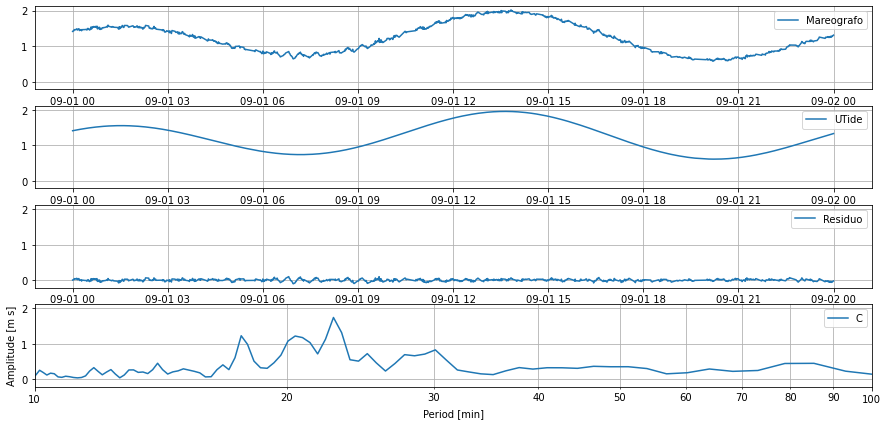

In [51]:
#mas pruebas de utide

#Utide
time=np.array(date2num(tiempo))
u=np.array(prs)

coef = solve(time, u,v=None,lat=lat_mareografo)
tide = reconstruct(time, coef)

utideh=relleno_zeros(u-tide.h)
f,S1,S2,coh2,phase,bw=FunXSpectra(utideh,utideh,60,6,0)

fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(15, 7),sharey=True)

ax1.plot(tiempo, u,label='Mareografo')
ax1.legend(numpoints=1)
ax1.grid()

ax2.plot(tiempo, tide.h,label='UTide')
ax2.legend(numpoints=1)
ax2.grid()

ax3.plot(tiempo,u-tide.h,label='Residuo')
ax3.legend(numpoints=1)
ax3.grid()

plt.xlim(10,100)

ax4.semilogx(1/f/60,S1)


ax4.legend('Caldera2020')
ax4.yaxis.grid(which="major")
ax4.xaxis.grid(which="both")
ax4.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax4.xaxis.set_minor_formatter(mtick.ScalarFormatter())
ax4.set_xlabel('Period [min]')
ax4.set_ylabel('Amplitude [m s]')



plt.savefig(os.path.join(dir_save,fname))
